In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine = pd.merge(trial_data, mouse_data, how='left', on='Mouse ID')

# Display the data table for preview
combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorgroup_mean = combine.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumorgroup_mean_df = pd.DataFrame(tumorgroup_mean)
tumorgroup_mean_df = tumorgroup_mean_df.rename(columns={'Tumor Volume (mm3)':'Average for Tumor Volumes'})
# Preview DataFrame
tumorgroup_mean_df.head()

Average for Tumor Volumes
Drug      Timepoint                           
Capomulin 0                          45.000000
          5                          44.266086
          10                         43.084291
          15                         42.064317
          20                         40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorgroup_sem = combine.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumorgroup_sem_df = pd.DataFrame(tumorgroup_sem)
tumorgroup_sem_df = tumorgroup_sem_df.rename(columns={'Tumor Volume (mm3)':'Standard Error of Tumor Volumes'})
# Preview DataFrame
tumorgroup_sem_df.head()

Standard Error of Tumor Volumes
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.448593
          10                                0.702684
          15                                0.838617
          20                                0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumorgroup_mean_pivot = tumorgroup_mean_df.unstack(level = 0)
tumorgroup_mean_pivot.columns = tumorgroup_mean_pivot.columns.get_level_values(1)

tumorgroup_sem_pivot = tumorgroup_sem_df.unstack(level = 0)
tumorgroup_sem_pivot.columns = tumorgroup_sem_pivot.columns.get_level_values(1)

# Preview that Reformatting worked

In [5]:
tumorgroup_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
tumorgroup_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


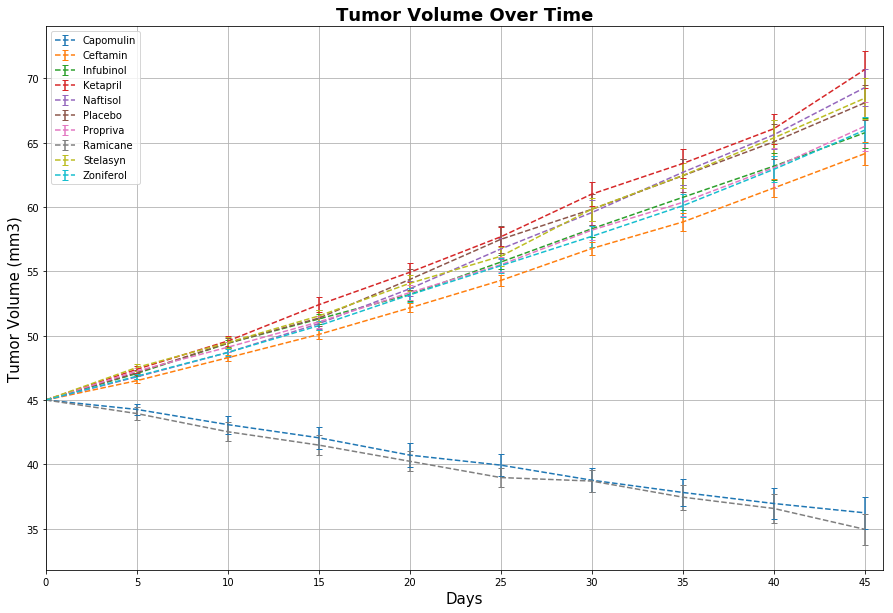

In [44]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, tumorgroup_mean_pivot.index.max()+3 , 5))
plt.xlim(0, tumorgroup_mean_pivot.index.max() + 1) 

# independent variable
x_axis = tumorgroup_mean_pivot.index

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for i in tumorgroup_mean_pivot.columns:
    plt.errorbar(x_axis, 
                 tumorgroup_mean_pivot[i], 
                 tumorgroup_sem_pivot[i], #std error
                 linestyle = '--', 
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count = count + 1
plt.legend()
plt.grid(True)

# Save the Figure
plt.savefig('tumor_vol.png')

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
groupmeta_mean = combine.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
groupmeta_mean_df = pd.DataFrame(groupmeta_mean)
# Preview DataFrame
groupmeta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
groupmeta_sem = combine.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
groupmeta_sem_df = pd.DataFrame(groupmeta_sem)
# Preview DataFrame
groupmeta_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
groupmeta_mean_pivot = groupmeta_mean_df.unstack(level = 0)
groupmeta_mean_pivot.columns = groupmeta_mean_pivot.columns.get_level_values(1)

groupmeta_sem_pivot = groupmeta_sem_df.unstack(level = 0)
groupmeta_sem_pivot.columns = groupmeta_sem_pivot.columns.get_level_values(1)

# Preview that Reformatting worked

In [11]:
# preview reformatted table for mean of metastatic sites
groupmeta_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# preview reformatted table for standard error of metastatic sites
groupmeta_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


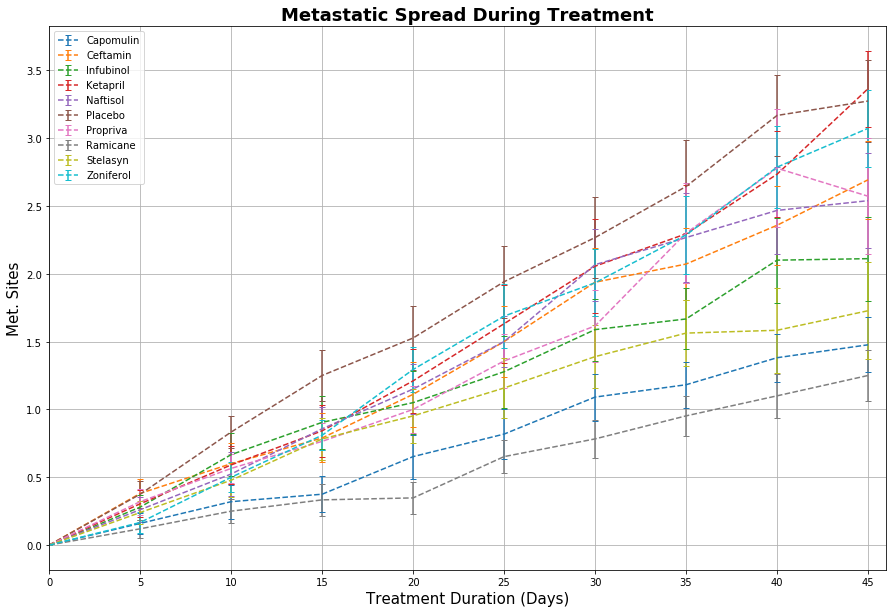

In [45]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title('Metastatic Spread During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Treatment Duration (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Met. Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, groupmeta_mean_pivot.index.max()+3 , 5))
plt.xlim(0, groupmeta_mean_pivot.index.max() + 1) 

# independent variable
x_axis = groupmeta_mean_pivot.index

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for i in groupmeta_mean_pivot.columns:
    plt.errorbar(x_axis, 
                 groupmeta_mean_pivot[i], 
                 yerr=groupmeta_sem_pivot[i], #std error
                 linestyle = '--', 
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count = count + 1
plt.legend()
plt.grid(True)

# Save the Figure
plt.savefig('meta_sprd.png')

In [40]:
tumor_percent_change.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

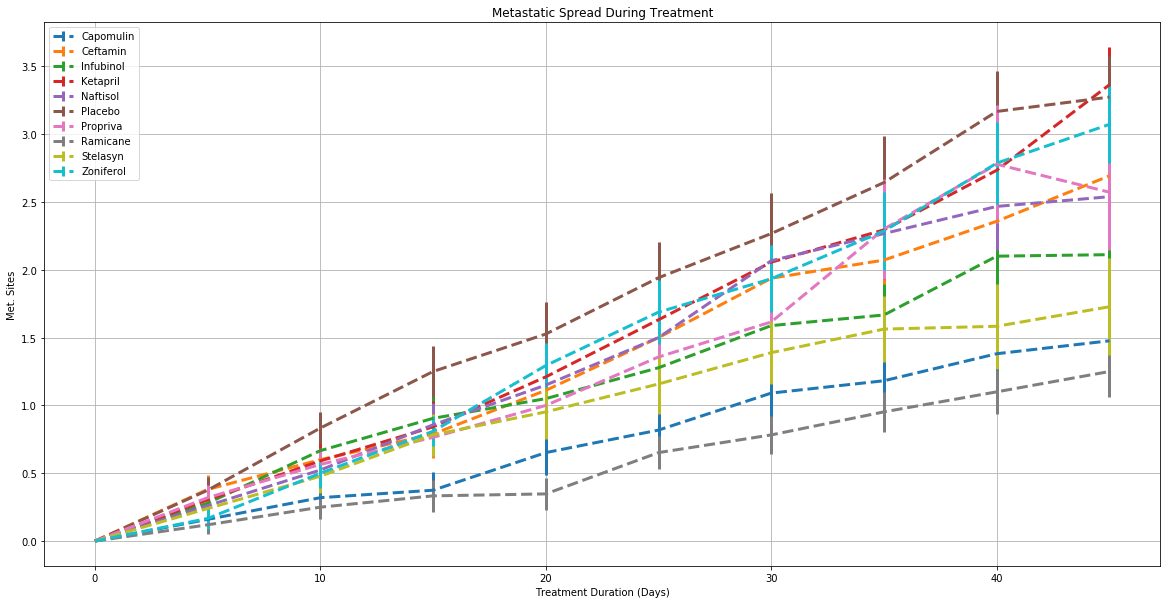

In [43]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(20,10))
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Capomulin"], yerr=groupmeta_sem_pivot["Capomulin"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Ceftamin"], yerr=groupmeta_sem_pivot["Ceftamin"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Infubinol"], yerr=groupmeta_sem_pivot["Infubinol"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Ketapril"], yerr=groupmeta_sem_pivot["Ketapril"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Naftisol"], yerr=groupmeta_sem_pivot["Naftisol"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Placebo"], yerr=groupmeta_sem_pivot["Placebo"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Propriva"], yerr=groupmeta_sem_pivot["Propriva"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Ramicane"], yerr=groupmeta_sem_pivot["Ramicane"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Stelasyn"], yerr=groupmeta_sem_pivot["Stelasyn"], markersize=5, linestyle="dashed", linewidth=3)
plt.errorbar(groupmeta_mean_pivot.index, groupmeta_mean_pivot["Zoniferol"], yerr=groupmeta_sem_pivot["Zoniferol"], markersize=5, linestyle="dashed", linewidth=3)

plt.legend()
plt.title('Metastatic Spread During Treatment')
plt.grid(True)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
# Save the Figure


# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine.groupby(['Drug', 'Timepoint']).count()['Tumor Volume (mm3)']
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
# Preview DataFrame
mice_count_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                          25
          5                          25
          10                         25
          15                         24
          20                         23

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.unstack(level = 0)
mice_count_df.columns = mice_count_df.columns.get_level_values(1)
# Preview the Data Frame
mice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


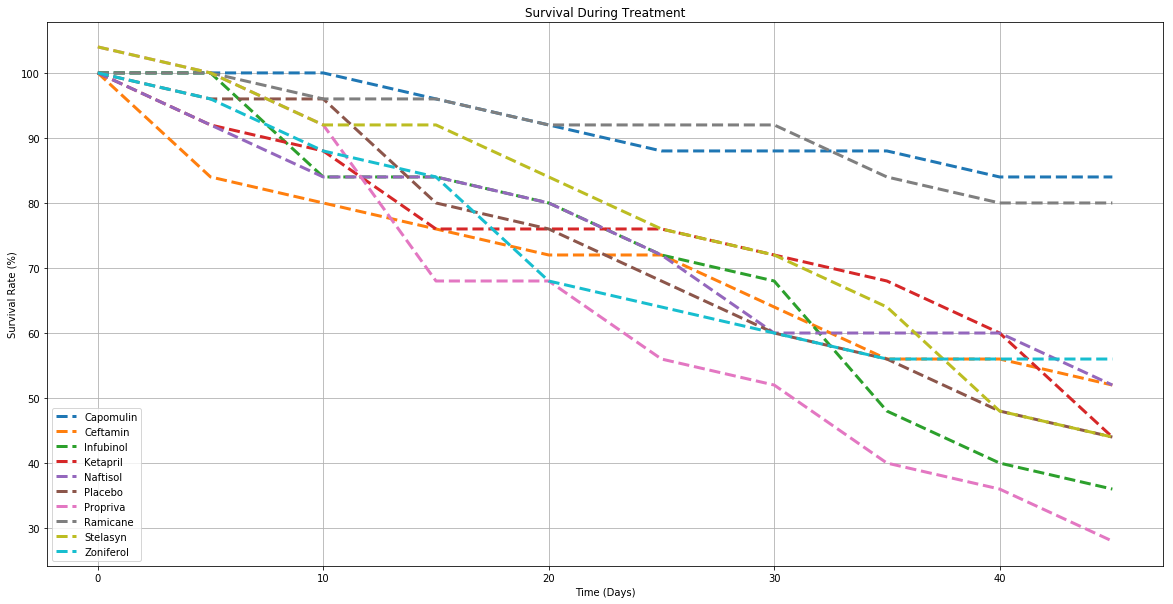

In [46]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(20,10))
plt.plot(100 * mice_count_df["Capomulin"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Ceftamin"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Infubinol"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Ketapril"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Naftisol"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Placebo"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Propriva"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Ramicane"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Stelasyn"] / 25, linestyle="dashed", markersize=5, linewidth=3)
plt.plot(100 * mice_count_df["Zoniferol"] / 25, linestyle="dashed", markersize=5, linewidth=3)

plt.legend()
plt.grid(True)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
           
# Save the Figure
plt.savefig('survival.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [36]:
# Calculate the percent changes for each drug
tumor_percent_change =  100 * (tumorgroup_mean_pivot.iloc[-1] - tumorgroup_mean_pivot.iloc[0]) / tumorgroup_mean_pivot.iloc[0]

# Display the data to confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [37]:
tumorpct_change = tumor_percent_change.sort_values()

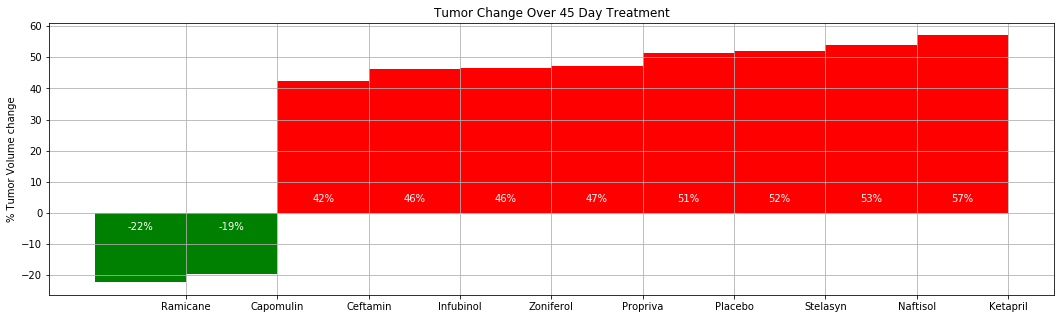

In [47]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
fig, ax = plt.subplots(figsize=(18,5))
ind = np.arange(len(tumorpct_change))
width = 1
rectpass = ax.bar(ind[:2], tumorpct_change[:2], width, color='green')
rectfail = ax.bar(ind[2:], tumorpct_change[2:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_xticklabels(tumorpct_change.index)
ax.set_ylabel('% Tumor Volume change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelfail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 3, '%d%%' % int(height), ha='center', va='bottom', color='white')
        
def autolabelpass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, -6, '%d%%' % int(height), ha='center', va='bottom', color='white')
                
# Call functions to implement the function calls
autolabelfail(rectfail)
autolabelpass(rectpass)

# Save the Figure
plt.savefig('tumorchg.png')

# Show the Figure
fig.show()